## Euler method

Let us write a generic function that computes the solution of an ODE by Euler's method. It takes an initial point $x_0$ which is supposed to belong to $\mathbb R^d$. It applies a given function $f : \mathbb R^d \to \mathbb R^d$. Let us assume, for simplicity, that the function $f$ does not depend on time.

In [1]:
function euler_method(x0::Array{<:Real,1}, f::Function, h::Real)
    x = x0 + h*f(x0)
    return x
end

euler_method (generic function with 1 method)

## Other methods for solving ODEs

Let us now implement the higher order obvious method, the modified Euler, and the RK4.

You may take a look at the [Wikipedia page](https://en.wikipedia.org/wiki/List_of_Runge%E2%80%93Kutta_methods#Classic_fourth-order_method) for Runge Kutta methods. The ones I am asking you to implement are listed there as "forward Euler", "Heun's method", and "Classic fourth-order method".

In [2]:
function modified_euler(x0::Array{<:Real,1}, f::Function, h::Real)
    xx = x0 + h*f(x0)
    x = x0 + h*(f(x0) + f(xx))/2
    return x
end

function RK4(x0::Array{<:Real,1}, f::Function, h::Real)
    k1 = f(x0)
    k2 = f(x0+h*k1/2)
    k3 = f(x0+h*k2/2)
    k4 = f(x0+h*k3)
    x = x0 + h*(k1+2*k2+2*k3+k4)/6
    return x
end

RK4 (generic function with 1 method)

### A bouncing ball

Let us now compute an ODE for a ball bouncing on a trampoline. Let $x(t)$ be the height of this ball, which should follow the following ODE.
$$ x'(t) = v(t), \qquad v'(t) = \begin{cases} -1 & \text{ if } x(t)>0, \\
-1 + x(t)^2 & \text{ if } x(t)<0. \end{cases} $$

In [3]:
function bouncing_ball(x::Array{<:Real,1})
    u = zeros(2)
    u[1] = x[2]
    if x[1]>0
        u[2] = -1
    else
        u[2] = -1. + x[1]^2
    end
    return u
end

bouncing_ball (generic function with 1 method)

If you wrote the function correctly, the following code should generate a pretty animation.

[ Info: Saved animation to /home/luis/Dropbox/tex/classes/Advanced Numerical Analysis/2024/tmp.gif


Plots.AnimatedGif("/home/luis/Dropbox/tex/classes/Advanced Numerical Analysis/2024/tmp.gif")
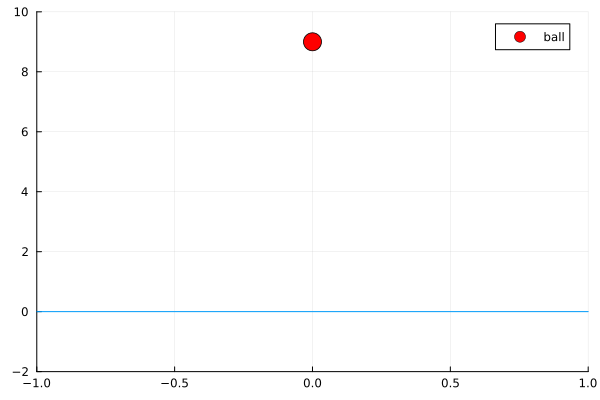

In [4]:
using Plots

let x = [9.,0.] , h = 0.1
    @gif for i in 1:105
        plot(xlims=(-1,1), ylims=(-2,10))
        if x[1]>0
            plot([-1.,1.],[0.,0.],label="")
        else
            plot([-1.,0.,1.],[0.,x[1],0.],label="")
        end
        scatter!([0.],[x[1]],color=:red, markersize=10, label="ball", xlims=(-1,1), ylims=(-2,10))
        x = RK4(x,bouncing_ball,h)
    end
end

# Challenge

Make a fancier ball movie.

In [83]:
function fancy_ball_time_step(u::Vector{<:Real}, v::Vector{<:Real}, bx::Real, bv::Real, k::Real)
    N = length(u)
    @assert N == length(v)
    h = 1/N
    un = similar(u)
    vn = similar(u)
    
    nbx = bx + k*bv
    nbv = bv - k
    
    ϵ = 0.01
    δ = 0.5
    
    for i in 1:N
        vn[i] = v[i] - k*u[i]/h^2 - δ*k*v[i]
        if i>1 
            vn[i] += k*(u[i-1]-u[i])/h^2
        end
        if i<N 
            vn[i] += k*u[i+1]/h^2 + k*(u[i+1] - u[i])/h^2/i
        end
    end
    
    un = u + k*vn
    
    if nbx < un[1]
        un[1] = nbx
        stress = (u[2]-u[1])/h
        if stress>0
            nbv += k*stress
        end
        vn[1] = nbv
    end    
    
    return un, vn, nbx, nbv
end

fancy_ball_time_step (generic function with 1 method)

[ Info: Saved animation to /home/luis/Dropbox/tex/classes/Advanced Numerical Analysis/2024/tmp.gif


Plots.AnimatedGif("/home/luis/Dropbox/tex/classes/Advanced Numerical Analysis/2024/tmp.gif")
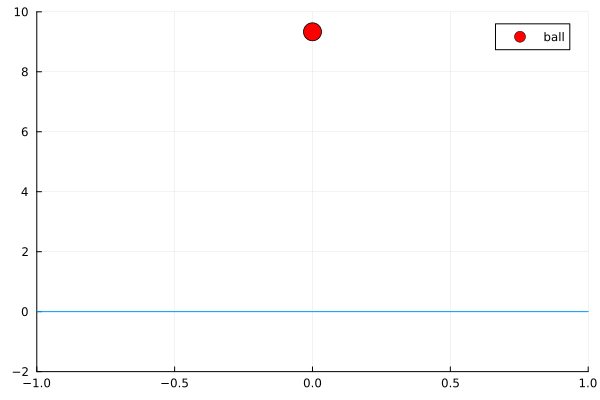

In [85]:
let x = [9.,0.] , h = 0.1, N=10
    u = zeros(N)
    v = zeros(N)
    bx = 9.
    bv = 0.
    @gif for i in 1:605
        plot(xlims=(-1,1), ylims=(-2,10))
        plot([-1.:2/(2*N):1.],vcat([0.],u[end:-1:2],u,[0.]),label="")
        scatter!([0.],[bx+1/3],color=:red, markersize=10, label="ball", xlims=(-1,1), ylims=(-2,10))

        x[1] += h*x[2]

        for i in 1:100
            u,v,bx,bv = fancy_ball_time_step(u,v,bx,bv,h/100)
        end
    end
end